In [11]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import PIL.Image as Image
import cv2
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from skimage import io

import shutil
import zipfile

%matplotlib inline

%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

rcParams['figure.figsize'] = 16, 10

np.random.seed(42)


In [7]:
sequences = ["0000"]
# print(f"{sequence:04d}")

In [16]:
root_dir = Path().cwd().parent

data_dir = root_dir / "data"
(data_dir/"interim").mkdir(parents=True, exist_ok=True)
data_dir = root_dir / "data"
(data_dir/"processed").mkdir(parents=True, exist_ok=True)

proc_kitti_dir = data_dir/"processed/KITTI"
shutil.rmtree(proc_kitti_dir, ignore_errors=True)
(proc_kitti_dir / "images").mkdir(parents=True, exist_ok=True)
(proc_kitti_dir / "labels").mkdir(parents=True, exist_ok=True)

raw_label_dir = data_dir / "raw/KITTI/data_tracking_label_2/training/label_02/"
raw_image_dir = data_dir / "raw/KITTI/data_tracking_image_2/training/label_02/"


In [ ]:
data_names = [
    "frame",
    "track_id",
    "type",
    "truncated",
    "occluded",
    "alpha",
    "bbox_left",
    "bbox_top",
    "bbox_right",
    "bbox_bottom",
    "dimension_width",
    "dimension_height",
    "dimension_length",
    "location_x",
    "location_y",
    "location_z",
    "rotation_y",
]

In [ ]:
for seq_id, sequence in enumerate(tqdm(sequences)):
    
    df = pd.read_csv(raw_label_dir / f"{sequence}.txt", delimiter=" ", names=data_names, index_col=False)
    
    for seq_id, sequence in enumerate(tqdm(sequences)):

        image_name = f"{img_id}.jpeg"

        img = urllib.request.urlopen(row["content"])

        img = Image.open(img)

        img = img.convert("RGB")

        img.save(str(images_path / image_name), "JPEG")

        label_name = f"{img_id}.txt"

        with (labels_path / label_name).open(mode="w") as label_file:

        for a in row['annotation']:

            for label in a['label']:

            category_idx = categories.index(label)

            points = a['points']

            p1, p2 = points

            x1, y1 = p1['x'], p1['y']

            x2, y2 = p2['x'], p2['y']

            bbox_width = x2 - x1

            bbox_height = y2 - y1

            label_file.write(

                f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"

            )

In [ ]:
data_names = [
    "frame",
    "track_id",
    "type",
    "truncated",
    "occluded",
    "alpha",
    "bbox_left",
    "bbox_top",
    "bbox_right",
    "bbox_bottom",
    "dimension_width",
    "dimension_height",
    "dimension_length",
    "location_x",
    "location_y",
    "location_z",
    "rotation_y",
]

df = pd.read_csv(
    data_dir / "raw/KITTI/data_tracking_label_2/training/label_02/0000.txt", delimiter=" ", names=data_names, index_col=False
)

df.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimension_width,dimension_height,dimension_length,location_x,location_y,location_z,rotation_y
0,0,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
1,0,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245


In [ ]:
df1 = df[df['type'].isin(['Car', 'Pedestrian', 'Cyclist'])]
df1.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimension_width,dimension_height,dimension_length,location_x,location_y,location_z,rotation_y
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
9,1,2,Pedestrian,0,0,-2.530402,1138.342096,160.872449,1223.338201,324.146788,1.714062,0.767881,0.972283,6.352093,1.593046,8.156156,-1.886840
13,2,1,Cyclist,0,0,-1.933364,752.406083,151.248515,946.562490,374.000000,1.739063,0.824591,1.785241,1.760880,1.605178,5.780931,-1.653453


(-0.5, 1241.5, 374.5, -0.5)

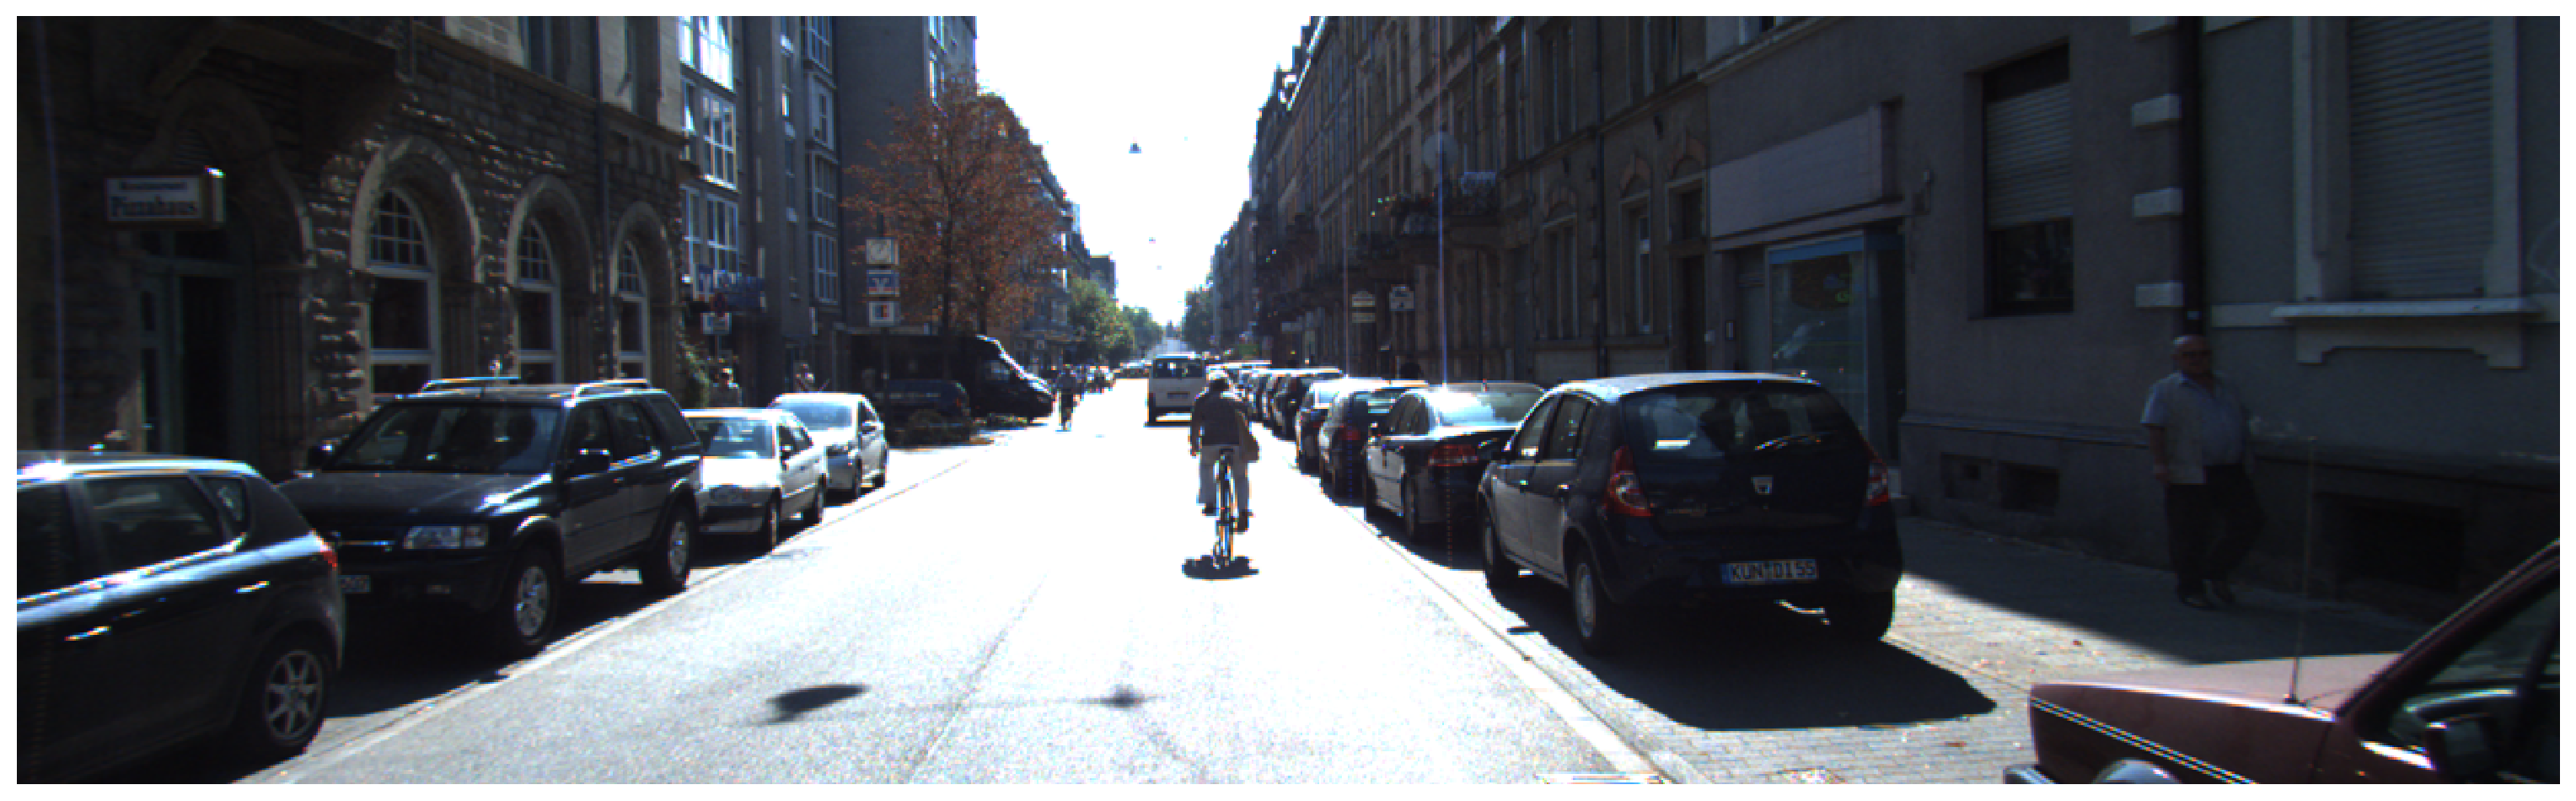

In [ ]:
img = io.imread(data_dir / f"raw/KITTI/data_tracking_image_2/training/label_02/0000/{frame:06d}.png")
io.imshow(img)

# Hide grid lines
plt.grid(False)
plt.axis('off')

# io.show()

In [ ]:
df2 = df1[df1['frame'].isin([frame])]
df2.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimension_width,dimension_height,dimension_length,location_x,location_y,location_z,rotation_y
1044,150,1,Cyclist,0,0,-1.626136,565.100759,166.268776,616.235079,267.136471,1.739063,0.824591,1.785241,-0.432672,1.638496,13.412023,-1.658943
1045,150,6,Car,1,0,-2.438617,939.756757,191.889486,1241.000000,374.000000,1.460938,1.583189,3.934669,2.814765,1.562867,2.351912,-1.624173
1046,150,7,Car,1,0,2.309621,0.000000,202.031334,176.815126,374.000000,1.500000,1.675028,4.026695,-5.454939,1.796885,5.606096,1.561488
1048,150,9,Car,0,0,-1.863195,709.656780,167.229106,933.479597,321.420944,1.596000,1.698089,3.562650,2.431149,1.564641,9.360472,-1.617939
1049,150,10,Car,0,1,-1.794925,651.565818,173.639314,783.187401,262.176848,1.524000,1.728591,3.894227,1.957031,1.568481,14.571276,-1.665076


In [ ]:


for index, row in df2.iterrows():
    # row = df1.iloc[0]
    print(row)
    print(row["type"])
    print("")

    match row["type"]:
        case "Cyclist"  :
            frame_color = (255, 0, 0)

        case "Car"  :
            frame_color = (0, 255, 0)

        case "Pedestrian"  :
            frame_color = (0, 0, 255)

    img = cv2.rectangle(
        img,
        (int(row["bbox_left"]), int(row["bbox_top"])),
        (int(row["bbox_right"]), int(row["bbox_bottom"])),
        color=frame_color,
        thickness=row["truncated"],
    )

    ((label_width, label_height), _) = cv2.getTextSize(
        row["type"], fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75, thickness=2
    )

    img = cv2.rectangle(
        img,
        (int(row["bbox_left"]), int(row["bbox_top"])),
        (
            int(row["bbox_left"] + label_width + label_width * 0.05),
            int(row["bbox_top"] + label_height + label_height * 0.25),
        ),
        color=frame_color,
        thickness=cv2.FILLED,
    )

    img = cv2.putText(
        img,
        row["type"],
        org=(
            int(row["bbox_left"]),
            int(row["bbox_top"] + label_height + label_height * 0.25),
        ),  # bottom left
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75,
        color=(255, 255, 255),
        thickness=2,
    )


frame                      150
track_id                     1
type                   Cyclist
truncated                    0
occluded                     0
alpha                -1.626136
bbox_left           565.100759
bbox_top            166.268776
bbox_right          616.235079
bbox_bottom         267.136471
dimension_width       1.739063
dimension_height      0.824591
dimension_length      1.785241
location_x           -0.432672
location_y            1.638496
location_z           13.412023
rotation_y           -1.658943
Name: 1044, dtype: object
Cyclist

frame                      150
track_id                     6
type                       Car
truncated                    1
occluded                     0
alpha                -2.438617
bbox_left           939.756757
bbox_top            191.889486
bbox_right              1241.0
bbox_bottom              374.0
dimension_width       1.460938
dimension_height      1.583189
dimension_length      3.934669
location_x            2.814765
loca

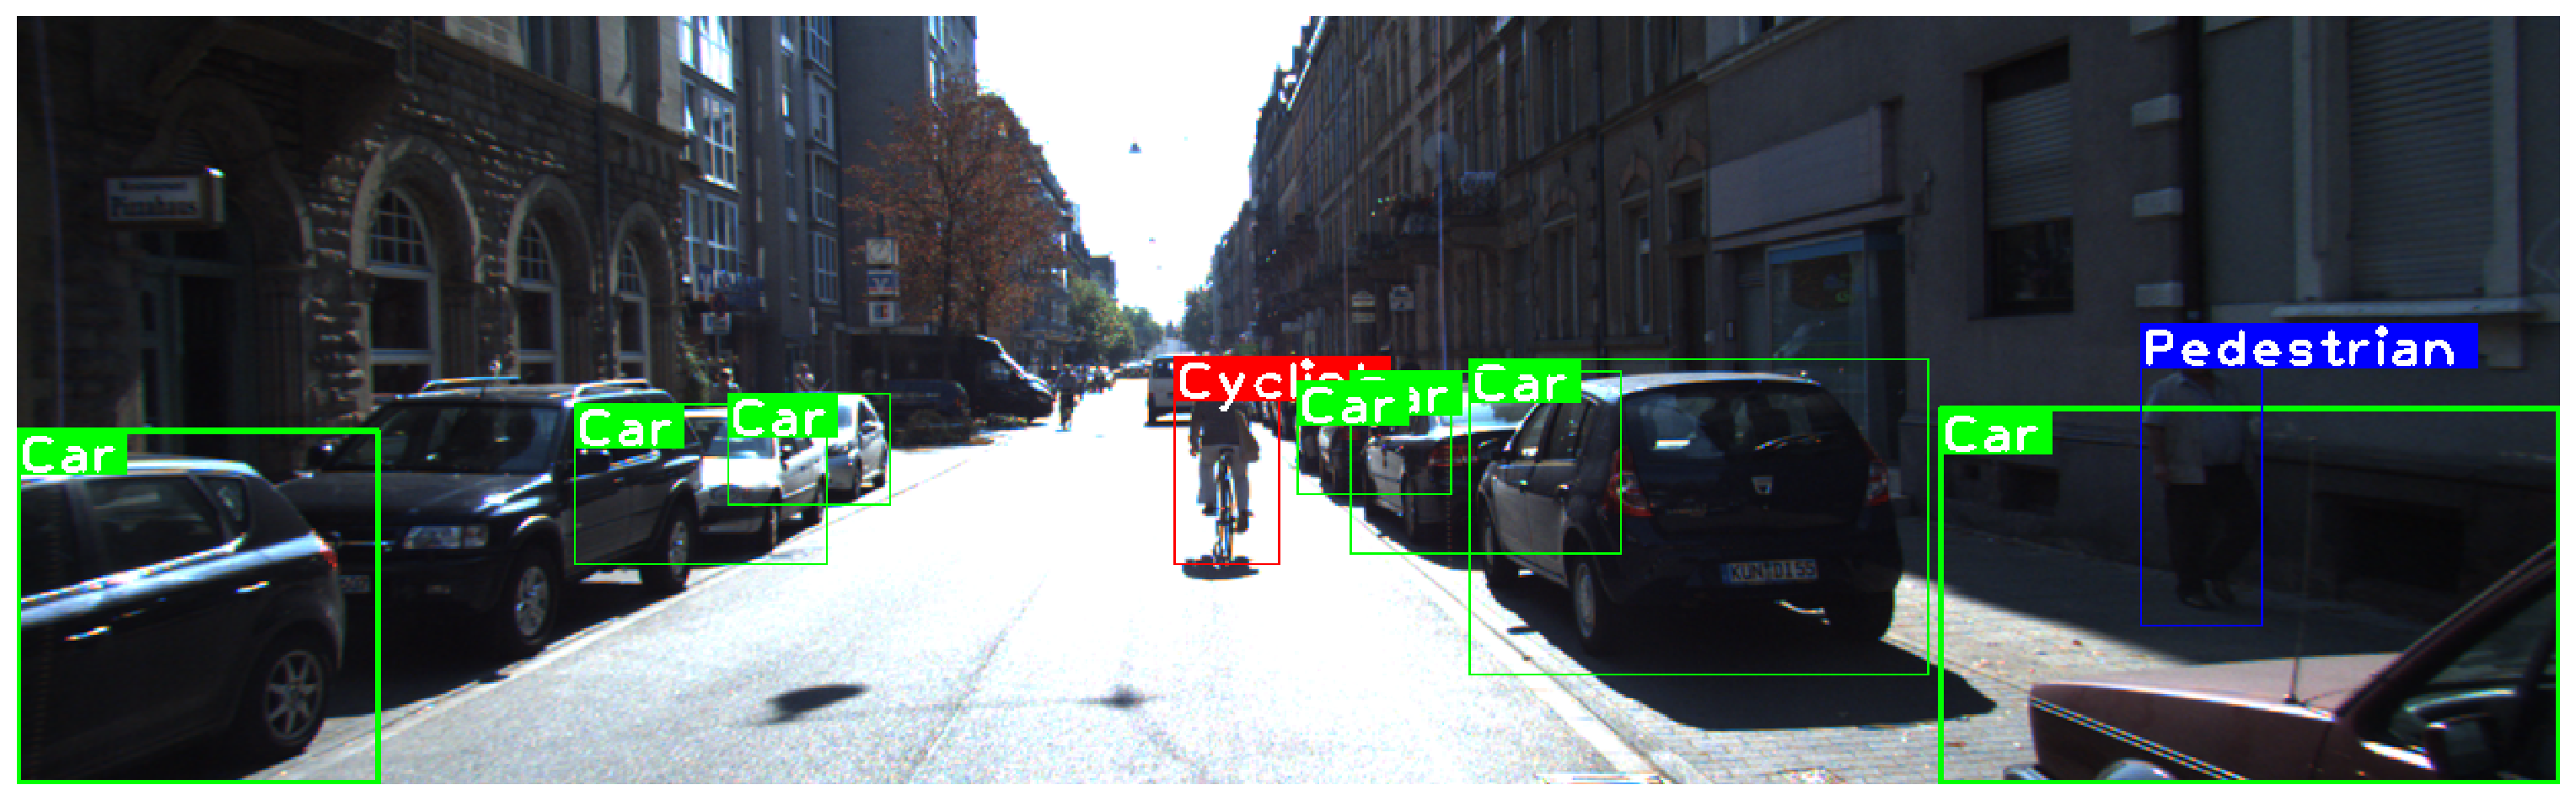

In [ ]:
io.imshow(img)

# Hide grid lines
plt.grid(False)
plt.axis('off')


io.show()